In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" #model will be trained on GPU 0

In [15]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib import rnn
# from skimage import feature
import numpy as np
import cv2 as cv
# import mahotas as mt
import scipy as sc
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.svm import LinearSVC
from skimage import feature
import numpy as np
# from skimage import feature
import numpy as np
numPoints=24

(161, 28, 28)
(161,)


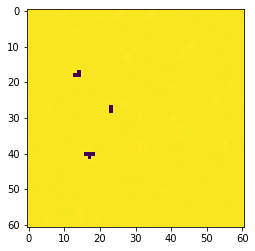

In [13]:
num_input = 3 # MNIST data input (image shape: 28x28)
timesteps = num_input       # Timesteps
n_classes = 3   # Number of classes, one class per digit


radius=6
eps=1e-7
lung_image=[]
labels=[]
i=0
for lung_dir_path in glob.glob("/home/rishotics/somita/patches/*"):
    i=int(lung_dir_path[36:-5])
    
    if(i>=1 and i <=59):
        label=0
    elif(i>59 and i<=109):
        label=1
    else:
        label=2
    
    image=cv.imread(lung_dir_path,0)
    if(i==7):
        plt.imshow(image)
#         print(image)
    image=cv.resize(image,(28,28))
    
    labels.append(label)
 #   labels.append(label)
    
    lung_image.append(image)
   # lung_image.append(image2)
    
lung_image=np.array(lung_image)
labels=np.array(labels)
lung_to_dict={i:k for k,i in enumerate(np.unique(labels))}
dict_to_id={i:k for k,i in lung_to_dict.items()}
label_id=np.array([lung_to_dict[x] for x in labels])
#lung_image=np.reshape(lung_image,(161*4,timesteps*timesteps))
print(lung_image.shape)
print(label_id.shape)


In [19]:
def LBP_features(image,radius):
    
    n_points = 8 * radius
    gray = image  
    lbp = feature.local_binary_pattern(gray, numPoints,radius, method="uniform")
  #  (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, numPoints + 3),range=(0, numPoints + 2))
 
		# normalize the histogram
 #   hist = hist.astype("float")
  #  hist /= (hist.sum() + eps)
   # hist=np.array(hist)
    return lbp
j=0


X1=np.zeros((lung_image.shape[0],28,28))
for i in lung_image:
   # glcm_features=glcm(i)
   # gabor_features=gabor_feature(i)
    lbp_features1 = LBP_features(i,1)
#     lbp_features2 = LBP_features(i,2)
    
    X1[j,:,:]=lbp_features1
#     X2[j,:,:]=lbp_features2
    j=j+1

X=X1
# y=np.concatenate((label_id,label_id),axis=0)
from keras.utils import to_categorical
#X=np.reshape(X,(322,61,61,1))
# y=np.reshape(y,(322,1))
y=label_id
X.shape,y.shape

((161, 28, 28), (161,))

In [20]:
train_X,valid_X,train_ground,valid_ground = train_test_split(np.reshape(lung_image,(-1,28,28,1))/255.0,np.reshape(lung_image,(-1,28,28,1))/255.0, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [48]:

import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
batch_size = 2
epochs = 200
inChannel = 1
x, y = 28,28
input_img = Input(shape = (x,y, inChannel))
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded


In [49]:
from keras import models
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [50]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_33 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_34 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        18496     
__________

In [51]:

autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))



Train on 128 samples, validate on 33 samples
Epoch 1/200
128/128 [==============================] - 5s 38ms/step - loss: 0.1332 - val_loss: 0.1002
Epoch 2/200
128/128 [==============================] - 3s 21ms/step - loss: 0.0924 - val_loss: 0.0593
Epoch 3/200
128/128 [==============================] - 3s 21ms/step - loss: 0.0800 - val_loss: 0.0709
Epoch 4/200
128/128 [==============================] - 3s 22ms/step - loss: 0.0630 - val_loss: 0.0727
Epoch 5/200
128/128 [==============================] - 3s 23ms/step - loss: 0.0559 - val_loss: 0.1038
Epoch 6/200
128/128 [==============================] - 3s 22ms/step - loss: 0.0510 - val_loss: 0.0388
Epoch 7/200
128/128 [==============================] - 3s 22ms/step - loss: 0.0401 - val_loss: 0.0513
Epoch 8/200
128/128 [==============================] - 3s 25ms/step - loss: 0.0387 - val_loss: 0.0460
Epoch 9/200
128/128 [==============================] - 3s 23ms/step - loss: 0.0352 - val_loss: 0.0390
Epoch 10/200
128/128 [===============

128/128 [==============================] - 3s 21ms/step - loss: 0.0067 - val_loss: 0.0248
Epoch 81/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0066 - val_loss: 0.0269
Epoch 82/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0065 - val_loss: 0.0246
Epoch 83/200
128/128 [==============================] - 3s 21ms/step - loss: 0.0062 - val_loss: 0.0250
Epoch 84/200
128/128 [==============================] - 3s 21ms/step - loss: 0.0063 - val_loss: 0.0248
Epoch 85/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0061 - val_loss: 0.0249
Epoch 86/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0061 - val_loss: 0.0254
Epoch 87/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0060 - val_loss: 0.0258
Epoch 88/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0059 - val_loss: 0.0249
Epoch 89/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0057 - 

128/128 [==============================] - 3s 20ms/step - loss: 0.0028 - val_loss: 0.0261
Epoch 160/200
128/128 [==============================] - 3s 21ms/step - loss: 0.0028 - val_loss: 0.0263
Epoch 161/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0027 - val_loss: 0.0254
Epoch 162/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0027 - val_loss: 0.0259
Epoch 163/200
128/128 [==============================] - 3s 21ms/step - loss: 0.0027 - val_loss: 0.0257
Epoch 164/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0027 - val_loss: 0.0262
Epoch 165/200
128/128 [==============================] - 3s 21ms/step - loss: 0.0025 - val_loss: 0.0258
Epoch 166/200
128/128 [==============================] - 3s 21ms/step - loss: 0.0027 - val_loss: 0.0254
Epoch 167/200
128/128 [==============================] - 3s 20ms/step - loss: 0.0026 - val_loss: 0.0256
Epoch 168/200
128/128 [==============================] - 3s 20ms/step - loss: 

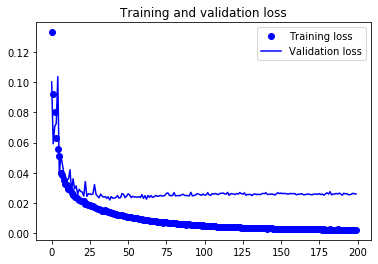

In [52]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [53]:
autoencoder.save_weights('autoencoder.h5')

In [54]:
print(label_id)
train_Y_one_hot = to_categorical(label_id)
# test_Y_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label:', label_id[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

[1 0 2 1 2 1 2 0 0 0 1 1 1 0 2 0 0 0 0 0 2 1 0 1 2 1 1 1 0 0 2 0 0 0 2 1 2
 0 2 0 1 0 0 2 2 2 2 2 1 1 1 0 0 2 0 0 2 1 0 2 2 2 2 1 2 2 1 2 0 1 2 0 2 2
 0 1 2 0 0 2 0 0 0 0 1 2 2 1 0 0 1 2 1 1 0 1 0 1 0 1 0 1 0 2 2 1 2 0 0 1 0
 0 1 1 2 1 2 0 0 0 1 0 1 1 0 2 1 2 1 1 2 2 2 0 1 1 2 2 2 1 1 0 2 0 2 2 2 2
 2 0 2 0 2 2 1 0 1 1 0 1 1]
Original label: 1
After conversion to one-hot: [0. 1. 0.]


In [55]:
train_X,valid_X,train_label,valid_label = train_test_split(np.reshape(lung_image,(-1,28,28,1))/255.0,train_Y_one_hot,test_size=0.2,random_state=13)


In [56]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((128, 28, 28, 1), (33, 28, 28, 1), (128, 3), (33, 3))

In [57]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

In [58]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

In [59]:
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
num_classes = 3
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))


In [60]:
for l1,l2 in zip(full_model.layers[:19],autoencoder.layers[0:19]):
    l1.set_weights(l2.get_weights())


In [61]:
for layer in full_model.layers[0:19]:
    layer.trainable = False

In [62]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [63]:
full_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_47 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_48 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 64)        18496     
__________

In [64]:
classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, valid_label))


W0718 00:03:08.530260 140609995380480 deprecation.py:323] From /home/rishotics/anaconda3/envs/rl3.6/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 128 samples, validate on 33 samples
Epoch 1/100
128/128 [==============================] - 1s 11ms/step - loss: 3.1632 - acc: 0.4688 - val_loss: 3.5840 - val_acc: 0.6364
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 2.7046 - acc: 0.6719 - val_loss: 1.6637 - val_acc: 0.6970
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 1.0438 - acc: 0.7578 - val_loss: 1.6477 - val_acc: 0.6061
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.7295 - acc: 0.7734 - val_loss: 1.5465 - val_acc: 0.6364
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5199 - acc: 0.8047 - val_loss: 1.5960 - val_acc: 0.6364
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4540 - acc: 0.8359 - val_loss: 1.4619 - val_acc: 0.6667
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4109 - acc: 0.8438 - val_loss: 1.4935 - val_acc: 0.6364
Epoch 8/100
128/128 [==

Epoch 62/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1506 - acc: 0.9844 - val_loss: 1.7784 - val_acc: 0.6061
Epoch 63/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1513 - acc: 0.9844 - val_loss: 1.7969 - val_acc: 0.6061
Epoch 64/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1511 - acc: 0.9844 - val_loss: 1.7568 - val_acc: 0.6061
Epoch 65/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1506 - acc: 0.9844 - val_loss: 1.7750 - val_acc: 0.6061
Epoch 66/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1488 - acc: 0.9844 - val_loss: 1.8146 - val_acc: 0.6061
Epoch 67/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1531 - acc: 0.9844 - val_loss: 1.8677 - val_acc: 0.6061
Epoch 68/100
128/128 [==============================] - 0s 2ms/step - loss: 0.1499 - acc: 0.9844 - val_loss: 1.8069 - val_acc: 0.6061
Epoch 69/100
128/128 [==============================] - 0s 2ms

In [65]:
full_model.save_weights('autoencoder_classification.h5')


In [66]:
for layer in full_model.layers[0:19]:
    layer.trainable = True

In [67]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [68]:
classify_train = full_model.fit(train_X, train_label, batch_size=64,epochs=100,verbose=1,validation_data=(valid_X, valid_label))


Train on 128 samples, validate on 33 samples
Epoch 1/100
128/128 [==============================] - 3s 22ms/step - loss: 0.9903 - acc: 0.8516 - val_loss: 2.0453 - val_acc: 0.6061
Epoch 2/100
128/128 [==============================] - 1s 6ms/step - loss: 0.9024 - acc: 0.8125 - val_loss: 3.3237 - val_acc: 0.6364
Epoch 3/100
128/128 [==============================] - 1s 6ms/step - loss: 0.3800 - acc: 0.9062 - val_loss: 1.7515 - val_acc: 0.6364
Epoch 4/100
128/128 [==============================] - 1s 7ms/step - loss: 0.3281 - acc: 0.9141 - val_loss: 1.4992 - val_acc: 0.6970
Epoch 5/100
128/128 [==============================] - 1s 7ms/step - loss: 0.2316 - acc: 0.9219 - val_loss: 1.5590 - val_acc: 0.6667
Epoch 6/100
128/128 [==============================] - 1s 8ms/step - loss: 0.1714 - acc: 0.9766 - val_loss: 2.0413 - val_acc: 0.7273
Epoch 7/100
128/128 [==============================] - 1s 8ms/step - loss: 0.2306 - acc: 0.9531 - val_loss: 2.1231 - val_acc: 0.7273
Epoch 8/100
128/128 [==

Epoch 62/100
128/128 [==============================] - 1s 6ms/step - loss: 0.1266 - acc: 0.9922 - val_loss: 2.7982 - val_acc: 0.6061
Epoch 63/100
128/128 [==============================] - 1s 5ms/step - loss: 0.1265 - acc: 0.9922 - val_loss: 2.8059 - val_acc: 0.6061
Epoch 64/100
128/128 [==============================] - 1s 6ms/step - loss: 0.1266 - acc: 0.9922 - val_loss: 2.8130 - val_acc: 0.6061
Epoch 65/100
128/128 [==============================] - 1s 6ms/step - loss: 0.1267 - acc: 0.9922 - val_loss: 2.8166 - val_acc: 0.6061
Epoch 66/100
128/128 [==============================] - 1s 6ms/step - loss: 0.1265 - acc: 0.9922 - val_loss: 2.8196 - val_acc: 0.6061
Epoch 67/100
128/128 [==============================] - 1s 6ms/step - loss: 0.1265 - acc: 0.9922 - val_loss: 2.8215 - val_acc: 0.6061
Epoch 68/100
128/128 [==============================] - 1s 6ms/step - loss: 0.1265 - acc: 0.9922 - val_loss: 2.8258 - val_acc: 0.6061
Epoch 69/100
128/128 [==============================] - 1s 6ms

In [69]:
full_model.save_weights('classification_complete.h5')


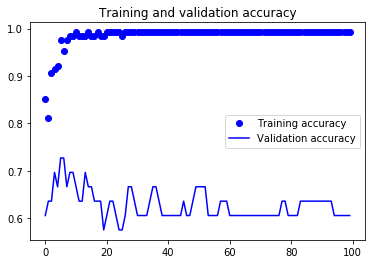

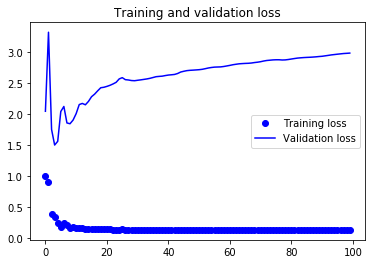

In [70]:
accuracy = classify_train.history['acc']
val_accuracy = classify_train.history['val_acc']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
predicted_classes = full_model.predict(np.reshape(lung_image,(-1,28,28,1))/255.0)

In [75]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [81]:
predicted_classes.shape, label_id.shape


((161,), (161,))

In [82]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(label_id, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.89      0.89        57
     Class 1       0.88      0.92      0.90        50
     Class 2       0.98      0.93      0.95        54

    accuracy                           0.91       161
   macro avg       0.91      0.91      0.91       161
weighted avg       0.91      0.91      0.91       161

